# Artifical Neural Network(ANN/MLP)

To understand the concept of the architecture of an artificial neural network, we have to understand what a neural network consists of. In order to define a neural network that consists of a large number of artificial neurons, which are termed units arranged in a sequence of layers. Lets us look at various types of layers available in an artificial neural network. The easiesy way to do this is to stack many fully-connected lyaers on top pof each other. Each layer feeds into layer above it, until we generate outputs. We can think of the first **L-1** layers as our representation and the final layer as our linear predictor. This architecture is commonly called a **multilayer perceptron**, often abbreviated as **MLP**. Below, we depcit an MLP diagramatically which  consists of three layers:

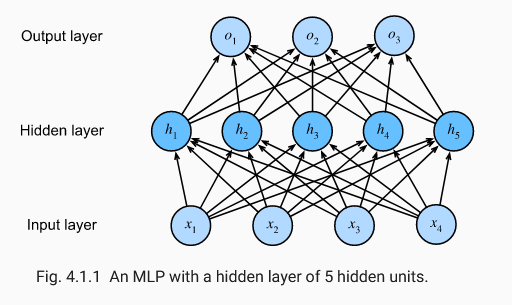

**Input Layer**: As the name suggests, it accepts inputs in several different formats provided by the programmer. The above MLP has 4 input layer units. 

**Hidden Layer**: The hidden layer presets in-between input and output layers. It performs all the calculations to find the hidden features and patterns. The above MLP has 5 hidden layer units. 

**Output Layer**: The input goes through a series of transformations using the hidden layer, which finally results in output that is conveyed using this layer.The above MLP has 3 output layer units. 

Since the input layer does not involve any calculations, producing outputs with this network requires implementing the computations for both the hidden and output layers; thus, the number of layers in this MLP is 2. Note that these layers are both fully connected. Every input influences every neuron in the hidden layer, and each of these in turn influences every neuron in the output layer.

The artificial neural network takes input and computes the weighted sum of the inputs and includes a bias. This computation is represented in the form of a transfer function. 
$$\sum_{i=1}^{n}W_{i}X_{i}+b$$
It determines weighted total is passed as an input to an activation function to produce the output. Activation functions choose whether a node should fire or not. Only those who are fired make it to the output layer. There are distinctive activation functions available that can be applied upon the sort of task we are performing.

# Activation Functions

**Visualization**: https://dashee87.github.io/deep%20learning/visualising-activation-functions-in-neural-networks/

**Activation Functions**: The activation function refers to the set of transfer functions used to achieve the desired output. They decide whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. They are differentiable operators to transform input signals to outputs, while most of them add non-linearity. 

Some of the commonly used sets of activation functions are:-
1. **ReLU Activation Function**: The most popular choice, due to both simplicity of implementation and its good performance on a variety of predictive tasks, is the rectified linear unit (ReLU). ReLU provides a very simple nonlinear transformation. Given an element x, the function is defined as the maximum of that element and 0: $ReLU(x) = max(x,0)$

    Informally, the ReLU function retains only positive elements and discards all negative elements by setting the corresponding activations to 0. 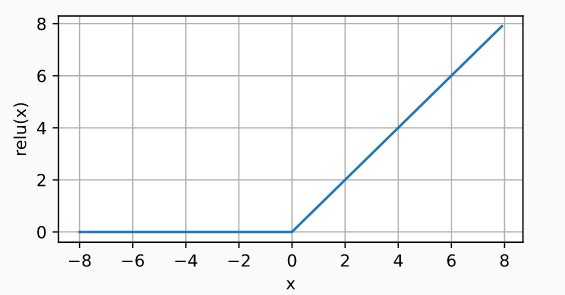
    When the input is negative, the derivative of the ReLU function is 0, and when the input is positive, the derivative of the ReLU function is 1. Note that the ReLU function is not differentiable when the input takes value precisely equal to 0. In these cases, we default to the left-hand-side derivative and say that the derivative is 0 when the input is 0. We can get away with this because the input may never actually be zero. There is an old adage that if subtle boundary conditions matter, we are probably doing (real) mathematics, not engineering. That conventional wisdom may apply here. We plot the derivative of the ReLU function plotted below. 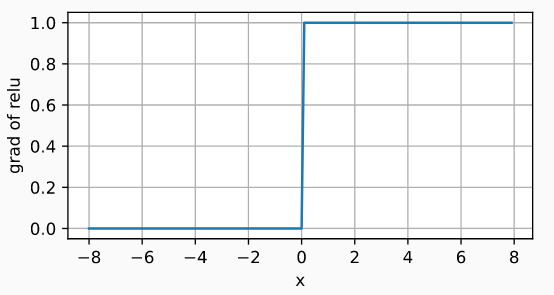
    The reason for using ReLU is that its derivatives are particularly well behaved: either they vanish or they just let the argument through
   - **Advantage**:
     - Solves Vanishing Gradient Problem
   - **Disadvantagne**: 
     - Dead neuron condition, Derivation of x with respect to x gives 1 but a derivation of negative weight with respect to x gives 0, thus there is no new weight to add in backpropagation resulting in dying relu or dead neuron condition.
     
     
2. **Sigmoid Activation Function**: The sigmoid function transforms its inputs, for which values lie in the domain R, to outputs that lie on the interval (0, 1). For that reason, the sigmoid is often called a squashing function: it squashes any input in the range (-inf, inf) to some value in the range (0, 1):
$$sigmoid(x) = \frac{1}{1+exp(-x)}$$

    In short, Whatever input it receives output values will between 0 and 1.  Sigmoids are still widely used as activation functions on the output units, when we want to interpret the outputs as probabilities for binary classification problems (you can think of the sigmoid as a special case of the softmax).
    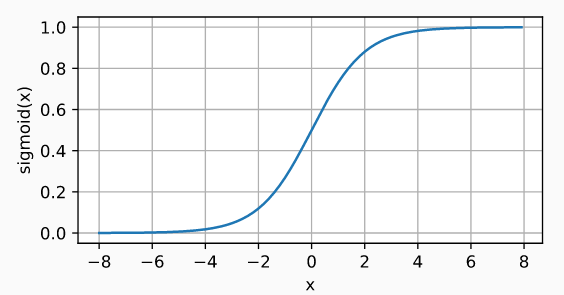
    The derivative of the sigmoid function is given by the following equation:
    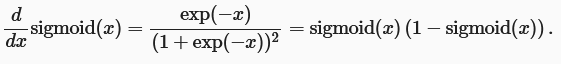
    The derivative of the sigmoid function is plotted below. Note that when the input is 0, the derivative of the sigmoid function reaches a maximum of 0.25. As the input diverges from 0 in either direction, the derivative approaches 0.s
    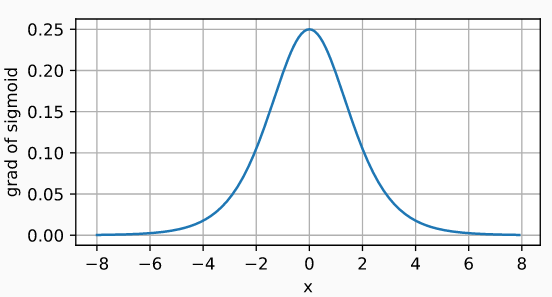
    - **Disadvantages**: 
        - The curve is not normally distributed so the network is computationally expensive and reaching global minima takes a lot of time.
        -  Vanishing gradient problem will happen in backpropagation due to which new weight that has to be added will be equal to the old weight and learning of the network is diminished.
        

3. **Tanh Activation Function**: Like the sigmoid function, the tanh (hyperbolic tangent) function also squashes its inputs, transforming them into elements on the interval between -1 and 1. 
    Simply, whatever input it receives, output values will between -1 and 1. 
    $$tanh(x) = \frac{1-exp(-2x)}{1+exp(-2x)}$$
    We plot the tanh function below. Note that as the input nears 0, the tanh function approaches a linear transformation. Although the shape of the function is similar to that of the sigmoid function, the tanh function exhibits point symmetry about the origin of the coordinate system.
    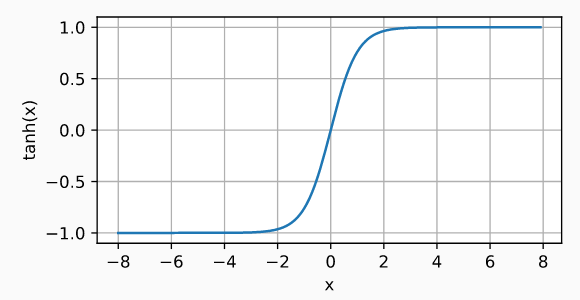
    The derivative of the tanh function is:
    $$\frac{d}{dx}tanh(x) = 1- tanh^{2}(x)$$
    The derivative of tanh function is plotted below. As the input nears 0, the derivative of the tanh function approaches a maximum of 1. And as we saw with the sigmoid function, as the input moves away from 0 in either direction, the derivative of the tanh function approaches 0.
    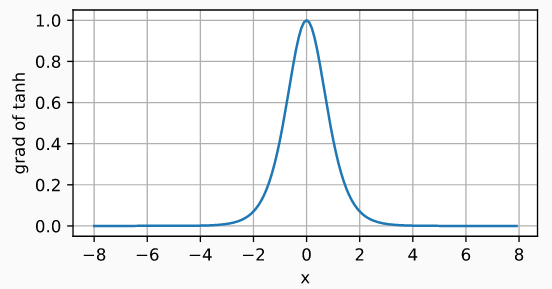
    
4. **Softmax Activation Function**: Softmax is an activation function that transforms numbers/logits into probabilites. The output of a Softmax is a vector (say v) with probabilities of each possible outcome. The probabilities in vector v sums to one for all possible outcomes or classes. Mathematically, Softmax is defined as, 
$$\sigma(y)_{i} =\frac{e^{a_{i}}}{\sum_{}^{j}e^{a_{j}}}$$
$$Derivative: \frac{d\sigma(a)}{da_{j}} = \sigma(a)(\delta_{ij}-\delta_{j}(a))\text{ where,} \delta_{ij}=1\text{ if i=j, otherwise, 0}$$

    **Note**: The softmax transformation transforms a bunch of arbitrarily large or small numbers into a valid probability distribution. 

## Training Error and Generalization Error

**Training Error**: The training error is the error of our model as calculated on the training dataset.

**Generalization Error**: Generalization error is the expectation of our model’s error were we to apply it to an infinite stream of additional data examples drawn from the same underlying data distribution as our original sample. we must estimate the generalization error by applying our model to an independent test set constituted of a random selection of data examples that were withheld from our training set.

## Validation Dataset
In principle we should not touch our test set until after we have chosen all our hyperparameters. Were we to use the test data in the model selection process, there is a risk that we might overfit the test data. Then we would be in serious trouble. If we overfit our training data, there is always the evaluation on test data to keep us honest. But if we overfit the test data, how would we ever know?

Thus, we should never rely on the test data for model selection. And yet we cannot rely solely on the training data for model selection either because we cannot estimate the generalization error on the very data that we use to train the model.

In practical applications, the picture gets muddier. While ideally we would only touch the test data once, to assess the very best model or to compare a small number of models to each other, real-world test data is seldom discarded after just one use. We can seldom afford a new test set for each round of experiments.

The common practice to address this problem is to split our data three ways, incorporating a validation dataset (or validation set) in addition to the training and test datasets. The result is a murky practice where the boundaries between validation and test data are worryingly ambiguous. Unless explicitly stated otherwise, in the experiments in this book we are really working with what should rightly be called training data and validation data, with no true test sets. Therefore, the accuracy reported in each experiment of the book is really the validation accuracy and not a true test set accuracy.

## Underfitting or Overfitting

**Underfitting**: When we compare the training and validation errors, we want to be mindful of two common situations. First, we want to watch out for cases when our training error and validation error are both substantial but there is a little gap between them. If the model is unable to reduce the training error, that could mean that our model is too simple (i.e., insufficiently expressive) to capture the pattern that we are trying to model. Moreover, since the generalization gap between our training and validation errors is small, we have reason to believe that we could get away with a more complex model. This phenomenon is known as underfitting.

**Overfitting**: On the other hand, as we discussed above, we want to watch out for the cases when our training error is significantly lower than our validation error, indicating severe overfitting. Note that overfitting is not always a bad thing. With deep learning especially, it is well known that the best predictive models often perform far better on training data than on holdout data. Ultimately, we usually care more about the validation error than about the gap between the training and validation errors.

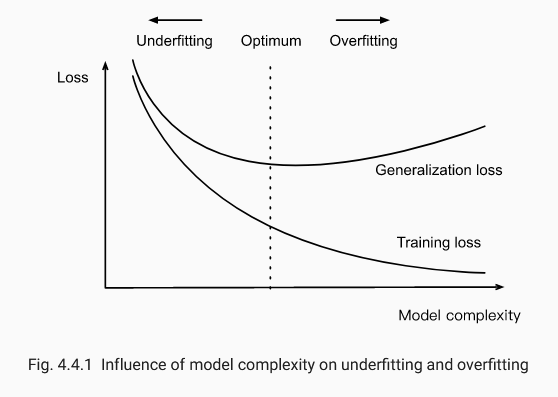

## Regularization

Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well.s

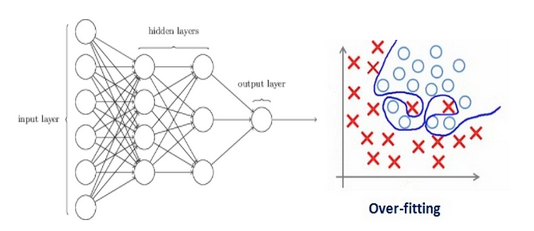

Regularization in general penalizes the coefficient i.e it penalizes the weight matrices of the nodes. 

Assume that our regularization coefficient is so high that some of the weight matrices are nearly equal to zero.
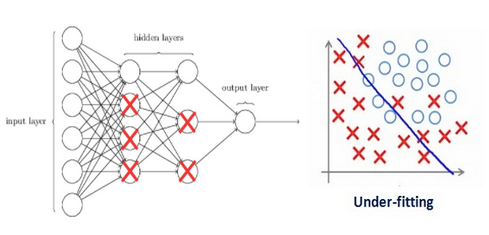
This will result in a much simpler linear network and slight underfitting of the training data.

Such a large value of the regularization coefficient is not that useful. We need to optimize the value of regularization coefficient in order to obtain a well-fitted model as shown in the image below.
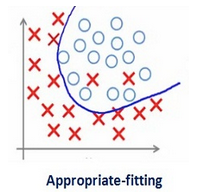

## Different Regularization Techniques in Deep Learning
Now that we have an understanding of how regularization helps in reducing overfitting, we’ll learn a few different techniques in order to apply regularization in deep learning.

### L2 & L1 Regularization
L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

$$\text{Cost function = Loss() + Regularization Term}$$

Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.
However, this regularization term differs in L1 and L2.
In L2, we have

$$Cost function = Loss + \frac{\lambda}{2}*\Sigma||w||^2$$

Here, lambda is the regularization parameter. It is the hyperparameter whose value is optimized for better results. L2 regularization is also known as weight decay as it forces the weights to decay towards zero (but not exactly zero).

In L1, we have

$$Cost function = Loss + \frac{\lambda}{2m}*\Sigma||w||$$

In this, we penalize the absolute value of the weights. Unlike L2, the weights may be reduced to zero here. Hence, it is very useful when we are trying to compress our model. Otherwise, we usually prefer L2 over it.

## Dropout

This is the one of the most interesting types of regularization techniques. It also produces very good results and is consequently the most frequently used regularization technique in the field of deep learning.

To understand dropout, let's say our neural network structure is shown as below: 
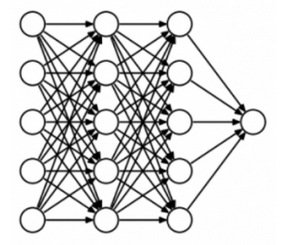
So what does dropout do? At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below.
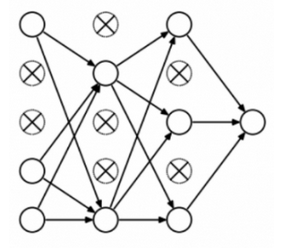
So each iteration has a different set of nodes and this results in a different set of outputs. It can also be thought of as an ensemble technique in machine learning.

Ensemble models usually perform better than a single model as they capture more randomness. Similarly, dropout also performs better than a normal neural network model.

This probability of choosing how many nodes should be dropped is the hyperparameter of the dropout function.  As seen in the image above, dropout can be applied to both the hidden layers as well as the input layers.

![DropoutURL](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif 'dropout')

# Optimizers

Any deep learning model tries to generalize the data using an algorithm and tries to make predictions on the unseen data. We need an algorithm that maps the examples of inputs to that of the outputs and an optimization algorithm. An optimization algorithm finds the value of the parameters(weights) that minimize the error when mapping inputs to outputs. These optimization algorithms or optimizers widely affect the accuracy of the deep learning model. They as well as affect the speed training of the model. 

While training the deep learning model, we need to modify each epoch’s weights and minimize the loss function. An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy. 

The problem of choosing the right weights for the model is a daunting task, as a deep learning model generally consists of millions of parameters. It raises the need to choose a suitable optimization algorithm for your application. 4

You can use different optimizers to make changes in your weights and learning rate. However, choosing the best optimizer depends upon the application.

As a beginner, one evil thought that comes to mind is that we try all the possibilities and choose the one that shows the best results. This might not be a problem initially, but when dealing with hundreds of gigabytes of data, even a single epoch can take a considerable amount of time. So randomly choosing an algorithm is no less than gambling with your precious time that you will realize sooner or later in your journey.

Some of the most common optimizers are: -
- Gradient Descent
- Stochastic Gradient Descent
- Stochastic Gradient Descent with Momentum
- Mini-Batch Gradient Descent
- Adagrad
- RMSProp
- AdaDelta
- Adam

### Some of the terms that we need to be familiar with before diving into Optimizers: -

- Epoch – The number of times the algorithm runs on the whole training dataset.

- Sample – A single row of a dataset.

- Batch – It denotes the number of samples to be taken to for updating the model parameters.

- Learning rate – It is a parameter that provides the model a scale of how much model weights should be updated.

- Cost Function/Loss Function – A cost function is used to calculate the cost that is the difference between the predicted value and the actual value.

- Weights/ Bias – The learnable parameters in a model that controls the signal between two neurons. 

### Gradient Descent Deep Learning Optimizer

Gradient Descent optimization algorithm uses calculus to modify the values consistently and to achieve the local minimum. In simple terms, consider you are holding a ball resting at the top of a bowl. When you lose the ball, it goes along the steepest direction and eventually settles at the bottom of the bowl. A Gradient provides the ball in the steepest direction to reach the local minimum that is the bottom of the bowl.
$$x_{new} = x - \alpha * f'(x)$$
The above equation means how the gradient is calculated. Here alpha is step size that represents how far to move against each gradient with each iteration.


**Working of Gradient Descent**
- It starts with some coefficients, sees their cost, and searches for cost value lesser than what it is now.
- It moves towards the lower weight and updates the value of the coefficients.
- The process repeats until the local minimum is reached. A local minimum is a point beyond which it can not proceed.

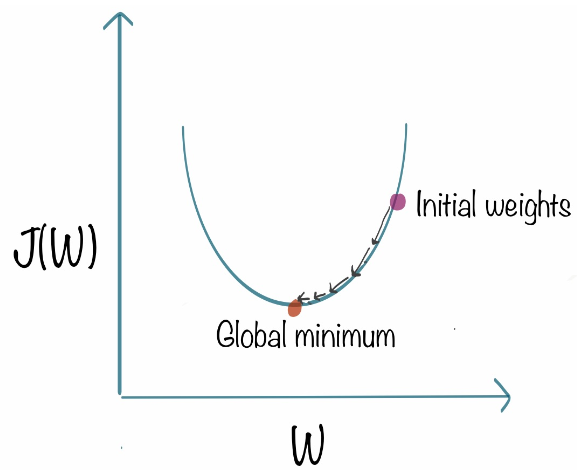

**Disadvantages of Gradient Descent:**
- Gradient descent works best for most purposes. However, it has some downsides too. It is expensive to calculate the gradients if the size of the data is huge. Gradient descent works well for convex functions but it doesn’t know how far to travel along the gradient for nonconvex functions.

### Stochastic Gradient Descent

At the end of the previous section, you learned why using gradient descent on massive data might not be the best option. To tackle the problem, we have stochastic gradient descent. The term stochastic means randomness on which the algorithm is based upon. In stochastic gradient descent, instead of taking the whole dataset for each iteration, we randomly select the batches of data. That means we only take few samples from the dataset.
$$w = w- \eta\bigtriangledown Q_i(w)$$
The procedure is first to select the initial parameters w and learning rate n. Then randomly shuffle the data at each iteration to reach an approximate minimum.

Since we are not using the whole dataset but the batches of it for each iteration, the path took by the algorithm is full of noise as compared to the gradient descent algorithm. Thus, SGD uses a higher number of iterations to reach the local minima. Due to an increase in the number of iterations, the overall computation time increases. But even after increasing the number of iterations, the computation cost is still less than that of the gradient descent optimizer. So the conclusion is if the data is enormous and computational time is an essential factor, stochastic gradient descent should be preferred over batch gradient descent algorithm.

### Stochastic Gradient Descent With Momentum

As discussed in th earlier section, we have learned that **Stochastic Gradient Descent** takes a much more noisy path than the `Gradient Descent Algorithm`.Due to this reason, it requires a more significant number of iterations to reach the optimal minimum and hence computation time is very slow. To overcome the problem, we use stochastic gradient descent with a momentum algorithm.

What the momentum does is helps in faster convergence of the loss function. Stochastic gradient descent oscillates between either direction of the gradient and updates the weights accordingly. However, adding a fraction of the previous update to the current update will make the process a bit faster. **One thing that should be remembered while using this algorithm is that the learning rate should be decreased with a high momentum term.**

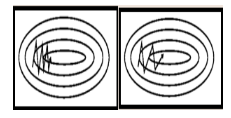


In the above image, the left part shows the convergence graph of the stochastic gradient descent algorithm. At the same time, the right side shows SGD with momentum. From the image, you can compare the path chosen by both the algorithms and realize that using momentum helps reach convergence in less time.**You might be thinking of using a large momentum and learning rate to make the process even faster. But remember that while increasing the momentum, the possibility of passing the optimal minimum also increases. This might result in poor accuracy and even more oscillations.**

### Mini Batch Gradient Descent 

In this variant of gradient descent instead of taking all the training data, only a subset of the dataset is used for calculating the loss function. Since we are using a batch of data instead of taking the whole dataset, fewer iterations are needed. That is why the mini-batch gradient descent algorithm is faster than both stochastic gradient descent and batch gradient descent algorithms. This algorithm is more efficient and robust than the earlier variants of gradient descent. As the algorithm uses batching, all the training data need not be loaded in the memory, thus making the process more efficient to implement. Moreover, the cost function in mini-batch gradient descent is noisier than the batch gradient descent algorithm but smoother than that of the stochastic gradient descent algorithm. Because of this, mini-batch gradient descent is ideal and provides a good balance between speed and accuracy.


**Disadvantages of Mini-Batch Gradient Descent**:

- Despite, all that, the mini-batch gradient descent algorithm has some downsides too. It needs a hyperparameter that is “mini-batch-size”, which needs to be tuned to achieve the required accuracy. Although, the batch size of 32 is considered to be appropriate for almost every case. Also, in some cases, it results in poor final accuracy. Due to this, there needs a rise to look for other alternatives too.

### Adagrad (Adaptive Gradient Descent)

The adaptive gradient descent algorithm is slightly different from other gradient descent algorithms. This is because it uses different learning rates for each iteration. The change in learning rate depends upon the difference in the parameters during training. The more the parameters get change, the more minor the learning rate changes. This modification is highly beneficial because real-world datasets contain sparse as well as dense features. So it is unfair to have the same value of learning rate for all the features. The Adagrad algorithm uses the below formula to update the weights.

$$w_{t} = w_{t-1}-\eta'_{t}\frac{\delta L}{\delta w(t-1)}$$
$$\eta'_{t} = \frac{\eta}{sqrt(\alpha_{t}+\epsilon)}$$

Hwere, the $\alpha(t)$ denotes the different learning rates at each iteration, n is a constant, and E is a small positive to avoid division by 0.

The benefit of using Adagrad is that it abolishes the need to modify the learning rate manually. It is more reliable than gradient descent algorithms and their variants, and it reaches convergence at a higher speed.

**Disadvantages of AdaGrad**: 
- One downside of AdaGrad optimizer is that it decreases the learning rate aggressively and monotonically. There might be a point when the learning rate becomes extremely small. This is because the squared gradients in the denominator keep accumulating, and thus the denominator part keeps on increasing. Due to small learning rates, the model eventually becomes unable to acquire more knowledge, and hence the accuracy of the model is compromised.

### RMS Prop (Root Mean Square)

RMS prop is one of the popular optimizers among deep learning enthusiasts. This is maybe because it hasn’t been published but still very well know in the community. RMS prop is ideally an extension of the work RPPROP. RPPROP resolves the problem of varying gradients. The problem with the gradients is that some of them were small while others may be huge. So, defining a single learning rate might not be the best idea. RPPROP uses the sign of the gradient adapting the step size individually for each weight. In this algorithm, the two gradients are first compared for signs. If they have the same sign, we’re going in the right direction and hence increase the step size by a small fraction. Whereas, if they have opposite signs, we have to decrease the step size. Then we limit the step size, and now we can go for the weight update.

The problem with RPPROP is that it doesn’t work well with large datasets and when we want to perform mini-batch updates. So, achieving the robustness of RPPROP and efficiency of mini-batches at the same time was the main motivation behind the rise of RMS prop. RMS prop can also be considered an advancement in AdaGrad optimizer as it reduces the monotonically decreasing learning rate.

The algorithm mainly focuses on accelerating the optimization process by decreasing the number of function evaluations to reach the local minima. The algorithm keeps the moving average of squared gradients for every weight and divides the gradient by the square root of the mean square.

$$v(w,t):=\gamma v(w,t-1)+(1-\gamma)(\bigtriangledown Q_{i}(w))^2$$

where, $\gamma$ is the forgetting factor. Weights are updated by the below formula
$$w:= w - \frac{\eta}{\sqrt{v(w,t)}}\bigtriangledown Q_{i}(w)$$
In simpler terms, if there exists a parameter due to which the cost function oscillates a lot, we want to penalize the update of this parameter.

Suppose you built a model to classify a variety of fishes. The model relies on the factor ‘color’ mainly to differentiate between the fishes. Due to which it makes a lot of errors. What RMS Prop does is, penalize the parameter ‘color’ so that it can rely on other features too. This prevents the algorithm from adapting too quickly to changes in the parameter ‘color’ compared to other parameters. This algorithm has several benefits as compared to earlier versions of gradient descent algorithms. The algorithm converges quickly and requires lesser tuning than gradient descent algorithms and their variants.

**Disadvantages of RMSProp**:
- The problem with RMS Prop is that the learning rate has to be defined manually and the suggested value doesn’t work for every application.

### AdaDelta

AdaDelta can be seen as a more robust version of AdaGrad optimizer. It is based upon adaptive learning and is designed to deal with significant drawbacks of AdaGrad and RMS prop optimizer. The main problem with the above two optimizers is that the initial learning rate must be defined manually. One other problem is the decaying learning rate which becomes infinitesimally small at some point. Due to which a certain number of iterations later, the model can no longer learn new knowledge.

To deal with these problems, AdaDelta uses two state variables to store the leaky average of the second moment gradient and a leaky average of the second moment of change of parameters in the model.

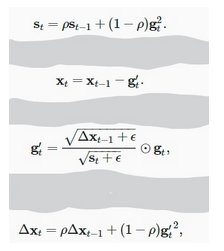

Here, $S_{t}$ and $\delta X_t$ denotes the state variables, $g'_t$ denotes the rescaled gradient, $\delta X_{t-1}$ denotes squares rescaled gradients, and epsilon represents a small positive integer to handle divison by 0. 

### Adam Optimizer

The name adam is derived from adaptive moment estimation. This optimization algorithm is a further extension of stochastic gradient descent to update network weights during training. Unlike maintaining a single learning rate through training in SGD, Adam optimizer updates the learning rate for each network weight individually. The creators of the Adam optimization algorithm know the benefits of AdaGrad and RMSProp algorithms, which are also extensions of the stochastic gradient descent algorithms. Hence the Adam optimizers inherit the features of both Adagrad and RMS prop algorithms. In adam, instead of adapting learning rates based upon the first moment(mean) as in RMS Prop, it also uses the second moment of the gradients. We mean the uncentred variance by the second moment of the gradients(we don’t subtract the mean).

The adam optimizer has several benefits, due to which it is used widely. It is adapted as a benchmark for deep learning papers and recommended as a default optimization algorithm. Moreover, the algorithm is straightforward to implement, has faster running time, low memory requirements, and requires less tuning than any other optimization algorithm.

$$m_t = \beta_1 m_{t-1} + (1-\beta_1)[\frac{\delta L}{\delta w_t}]v_t= \beta_2v_{t-1} + (1-\beta_2)[\frac{\delta L}{\delta w_t}]^2$$

The above formula represents the working of adam optimizer. Here $\beta_1$ and $\beta_2$ represent the decay rate of the average of the gradients.

**Notes**: If the adam optimizer uses the good properties of all the algorithms and is the best available optimizer, then why shouldn’t you use Adam in every application? And what was the need to learn about other algorithms in depth?  This is because even Adam has some downsides. It tends to focus on faster computation time, whereas algorithms like stochastic gradient descent focus on data points. That’s why algorithms like SGD generalize the data in a better manner at the cost of low computation speed. So, the optimization algorithms can be picked accordingly depending upon the requirements and the type of data.

![Optimizers](https://editor.analyticsvidhya.com/uploads/121381obtV.gif 'optimizers')
![Optimizers](https://editor.analyticsvidhya.com/uploads/56201contours_evaluation_optimizers.gif 'optimizers')

## Practical Applications

In [1]:
import tensorflow as tf
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test)  = mnist.load_data()

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
from tensorflow import keras

In [7]:
X_train[0].shape

(28, 28)

In [8]:
def build_model(optimizer): 
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Dropout(0.25),

        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
                 optimizer = optimizer,
                 metrics=['accuracy'])
    return model

In [10]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

models = []

for optimizer in optimizers:
    model = build_model(optimizer)
    models.append(model)

for model in models:
    model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
938/938 [==============================] - 33s 34ms/step - loss: 2.2622 - accuracy: 0.1912 - val_loss: 2.2083 - val_accuracy: 0.4567
Epoch 2/10
938/938 [==============================] - 28s 30ms/step - loss: 2.1789 - accuracy: 0.3494 - val_loss: 2.1103 - val_accuracy: 0.6241
Epoch 3/10
938/938 [==============================] - 27s 28ms/step - loss: 2.0808 - accuracy: 0.4690 - val_loss: 1.9957 - val_accuracy: 0.6945
Epoch 4/10
938/938 [==============================] - 28s 30ms/step - loss: 1.9678 - accuracy: 0.5538 - val_loss: 1.8655 - val_accuracy: 0.7343
Epoch 5/10
938/938 [==============================] - 30s 32ms/step - loss: 1.8412 - accuracy: 0.6051 - val_loss: 1.7241 - val_accuracy: 0.7600
Epoch 6/10
938/938 [==============================] - 28s 29ms/step - loss: 1.7066 - accuracy: 0.6447 - val_loss: 1.5763 - val_accuracy: 0.7818
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 1.5683 - accuracy: 0.6736 - val_loss: 1.4278 - val_accuracy: